In [156]:
import kagglehub
ryanholbrook_dl_course_data_path = kagglehub.dataset_download('ryanholbrook/dl-course-data')

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
hotel = pd.read_csv(f'{ryanholbrook_dl_course_data_path}/hotel.csv')


In [159]:
hotel.shape

(119390, 32)

In [160]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [161]:
hotel['reservation_status_date']= pd.to_datetime(hotel['reservation_status_date'])
hotel['reservation_year'] = hotel['reservation_status_date'].dt.year
hotel['reservation_month'] = hotel['reservation_status_date'].dt.month
hotel['reservation_day'] = hotel['reservation_status_date'].dt.day
hotel['reservation_dayofweek'] = hotel['reservation_status_date'].dt.dayofweek
hotel.drop(columns=['reservation_status_date'], inplace=True)

In [162]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_year,reservation_month,reservation_day,reservation_dayofweek
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016.093743,6.334123,15.666639,2.885267
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,0.715306,3.346352,8.778432,1.984289
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016.000000,3.000000,8.000000,1.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016.000000,6.000000,16.000000,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017.000000,9.000000,23.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017.000000,12.000000,31.000000,6.000000


In [163]:
pd.set_option('display.max_columns', None)
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_year,reservation_month,reservation_day,reservation_dayofweek
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015,7,1,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015,7,1,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015,7,2,3
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015,7,2,3
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015,7,3,4


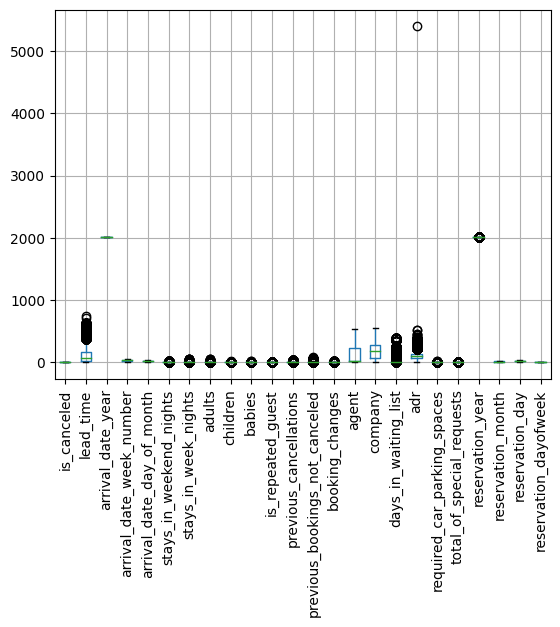

In [164]:
hotel.boxplot()
plt.xticks(rotation=90)
plt.show()

In [165]:
#remove outliers from adr 
hotel = hotel[hotel['adr'] < 1000]

In [166]:
hotel = hotel.applymap(lambda x: None if x == 'Undefined' else x)

In [167]:
hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                1169
country                              488
market_segment                         2
distribution_channel                   5
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [168]:
hotel.drop(columns=['company', 'agent'], inplace=True)

In [169]:
hotel['children'].fillna(0, inplace=True)
hotel['country'].fillna(hotel['country'].mode()[0], inplace=True)
hotel['meal'].fillna(hotel['meal'].mode()[0], inplace=True)
hotel['market_segment'].fillna(hotel['market_segment'].mode()[0], inplace=True)
hotel['distribution_channel'].fillna(hotel['distribution_channel'].mode()[0], inplace=True)

In [170]:
hotel.isna().sum().sum()

0

In [171]:
hotel.duplicated().sum()

32039

In [172]:
hotel.drop_duplicates(inplace=True)
hotel.shape

(87350, 33)

In [173]:
for col in hotel.select_dtypes(include=['object']).columns:
    if col =='country':
        continue
    print(hotel[col].value_counts())
    print('---')

City Hotel      53413
Resort Hotel    33937
Name: hotel, dtype: int64
---
August       11254
July         10052
May           8353
April         7903
June          7764
March         7507
October       6932
September     6688
February      6089
December      5127
November      4992
January       4689
Name: arrival_date_month, dtype: int64
---
BB    68429
SC     9480
HB     9082
FB      359
Name: meal, dtype: int64
---
Online TA        51609
Offline TA/TO    13877
Direct           11796
Groups            4939
Corporate         4200
Complementary      702
Aviation           227
Name: market_segment, dtype: int64
---
TA/TO        69122
Direct       12978
Corporate     5069
GDS            181
Name: distribution_channel, dtype: int64
---
A    56512
D    17397
E     6045
F     2822
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64
---
A    46284
D    22421
E     7191
F     3625
G     2498
C     2165
B     1820
H      706
I      357
K    

In [174]:
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

hotel['arrival_date_month'] = hotel['arrival_date_month'].map(month_map)



In [175]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
for col in hotel.select_dtypes(include=['object']).columns:
    if col == 'country':
        continue
    hotel[col] = le.fit_transform(hotel[col])
    
ohe= OneHotEncoder(sparse_output=False, drop='first')
hotel_ohe = pd.DataFrame(ohe.fit_transform(hotel[['country']]))
hotel_ohe.columns = ohe.get_feature_names_out(['country'])
hotel_ohe.index = hotel.index
hotel = pd.concat([hotel, hotel_ohe], axis=1)
hotel.drop(columns=['country'], inplace=True)


In [176]:
hotel.shape

(87350, 208)

In [177]:
import seaborn as sns
corr = hotel.corr()["is_canceled"].abs().sort_values(ascending=False)
print(corr.head(10))

is_canceled                    1.000000
reservation_status             0.888715
lead_time                      0.184689
required_car_parking_spaces    0.184294
market_segment                 0.181768
distribution_channel           0.150138
deposit_type                   0.137453
adr                            0.133448
reservation_dayofweek          0.122305
total_of_special_requests      0.120597
Name: is_canceled, dtype: float64


In [178]:
#let's drop reservation_status because it is probably an indicator of the target variable
hotel.drop(columns=['reservation_status'], inplace=True)


In [179]:
from sklearn.model_selection import train_test_split

X = hotel.copy()
y = X.pop('is_canceled')

# Split data into train and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the sizes of the splits
print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

from sklearn.preprocessing import RobustScaler

# Select numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform the validation and test data
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

Train size: 61145, Validation size: 13102, Test size: 13103


Baseline Model - Validation Set:
410/410 [==============================] - 1s 2ms/step
Accuracy: 0.9971
Precision: 0.9972
Recall: 0.9922
F1 Score: 0.9947

Confusion Matrix:
[[9489   10]
 [  28 3575]]

Baseline Model - Test Set:
410/410 [==============================] - 2s 4ms/step
Accuracy: 0.9973
Precision: 0.9978
Recall: 0.9922
F1 Score: 0.9950

Confusion Matrix:
[[9492    8]
 [  28 3575]]


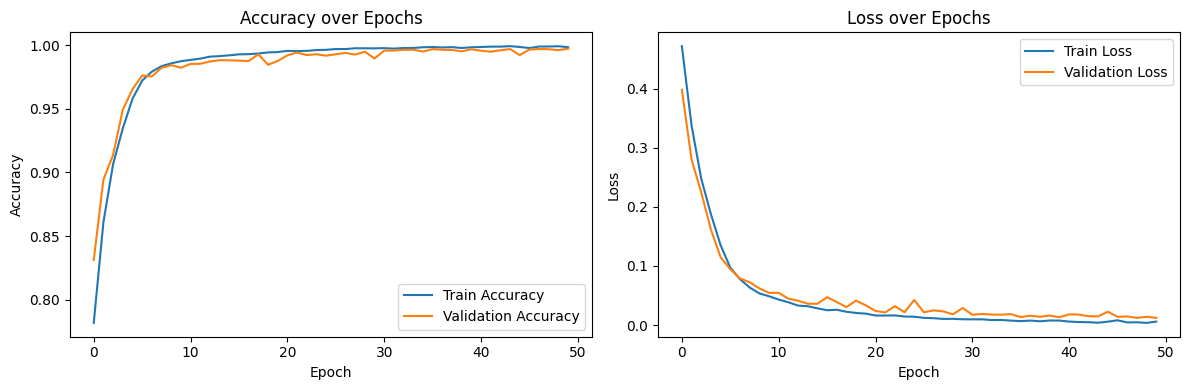

In [180]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

def build_baseline_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = build_baseline_model()
baseline_history = baseline_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    verbose=0
)

# Evaluate baseline model
def evaluate_model(model, X, y):
    y_pred = (model.predict(X) > 0.5).astype(int)
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred))

print("Baseline Model - Validation Set:")
evaluate_model(baseline_model, X_val, y_val)

print("\nBaseline Model - Test Set:")
evaluate_model(baseline_model, X_test, y_test)

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(baseline_history)

Underfit Model - Validation Set:
410/410 [==============================] - 2s 4ms/step
Accuracy: 0.8796
Precision: 0.9182
Recall: 0.6170
F1 Score: 0.7380

Confusion Matrix:
[[9301  198]
 [1380 2223]]


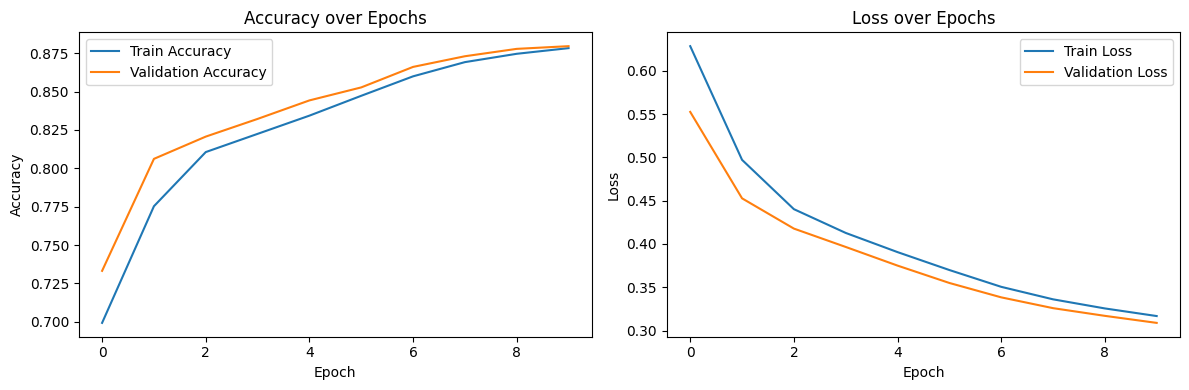

In [183]:
def build_underfit_model():
    model = keras.Sequential([
        layers.Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

underfit_model = build_underfit_model()
underfit_history = underfit_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  
    batch_size=256,
    verbose=0
)

print("Underfit Model - Validation Set:")
evaluate_model(underfit_model, X_val, y_val)
plot_history(underfit_history)




Fixed Underfit Model - Validation Set:
410/410 [==============================] - 1s 2ms/step
Accuracy: 0.9917
Precision: 0.9786
Recall: 0.9914
F1 Score: 0.9850

Confusion Matrix:
[[9421   78]
 [  31 3572]]


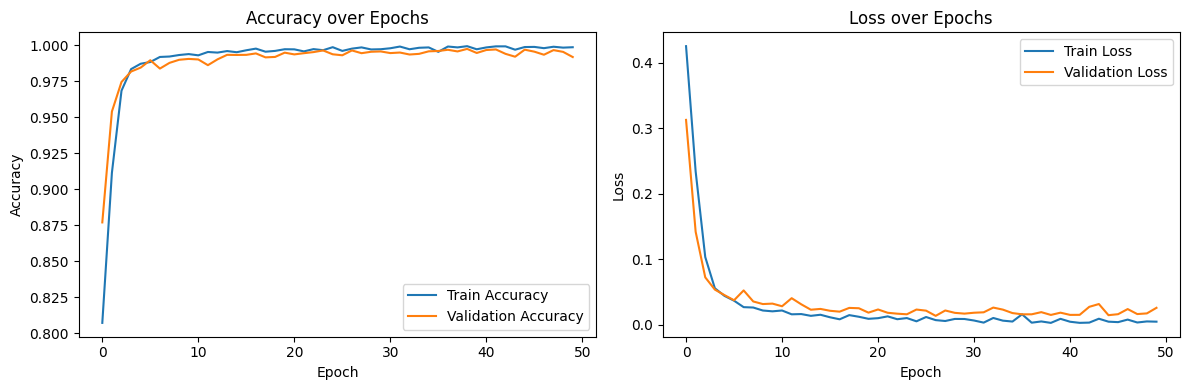

In [184]:
# Fixing underfitting by increasing model capacity and training time
def build_fixed_underfit_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

fixed_underfit_model = build_fixed_underfit_model()
fixed_underfit_history = fixed_underfit_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    verbose=0
)

print("\nFixed Underfit Model - Validation Set:")
evaluate_model(fixed_underfit_model, X_val, y_val)
plot_history(fixed_underfit_history)

Overfit Model - Validation Set:
410/410 [==============================] - 2s 3ms/step
Accuracy: 0.9964
Precision: 0.9966
Recall: 0.9903
F1 Score: 0.9935

Confusion Matrix:
[[9487   12]
 [  35 3568]]


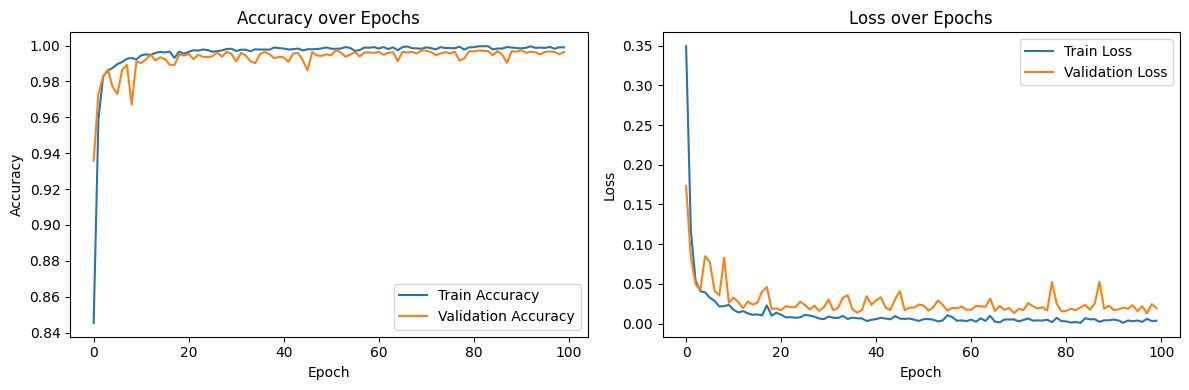

In [185]:
def build_overfit_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

overfit_model = build_overfit_model()
overfit_history = overfit_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # More epochs to encourage overfitting
    batch_size=256,
    verbose=0
)

print("Overfit Model - Validation Set:")
evaluate_model(overfit_model, X_val, y_val)
plot_history(overfit_history)



Early Stopping Model - Validation Set:
410/410 [==============================] - 3s 6ms/step
Accuracy: 0.9933
Precision: 0.9938
Recall: 0.9817
F1 Score: 0.9877

Confusion Matrix:
[[9477   22]
 [  66 3537]]


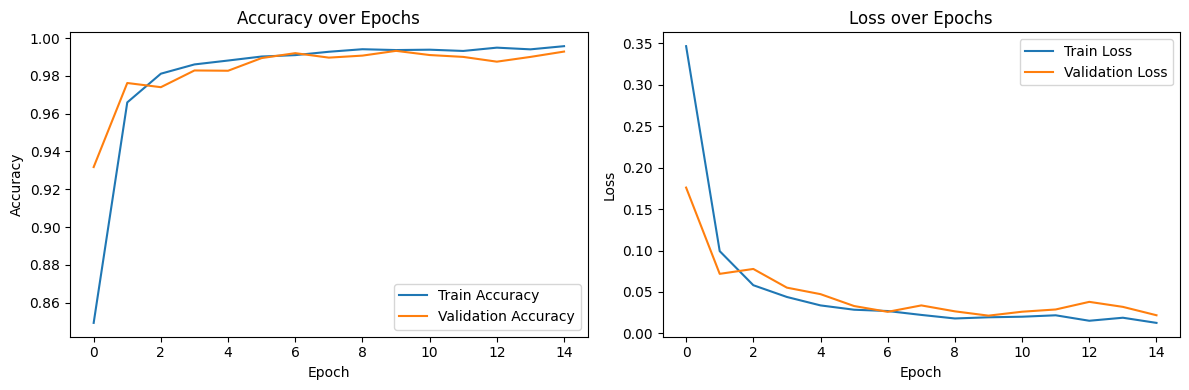

In [188]:
def build_early_stopping_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

early_stopping_model = build_early_stopping_model()
early_stopping_history = early_stopping_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping],
    verbose=0
)

print("Early Stopping Model - Validation Set:")
evaluate_model(early_stopping_model, X_val, y_val)
plot_history(early_stopping_history)

Batch Normalization Model - Validation Set:
410/410 [==============================] - 2s 3ms/step
Accuracy: 0.9887
Precision: 0.9903
Recall: 0.9684
F1 Score: 0.9792

Confusion Matrix:
[[9465   34]
 [ 114 3489]]


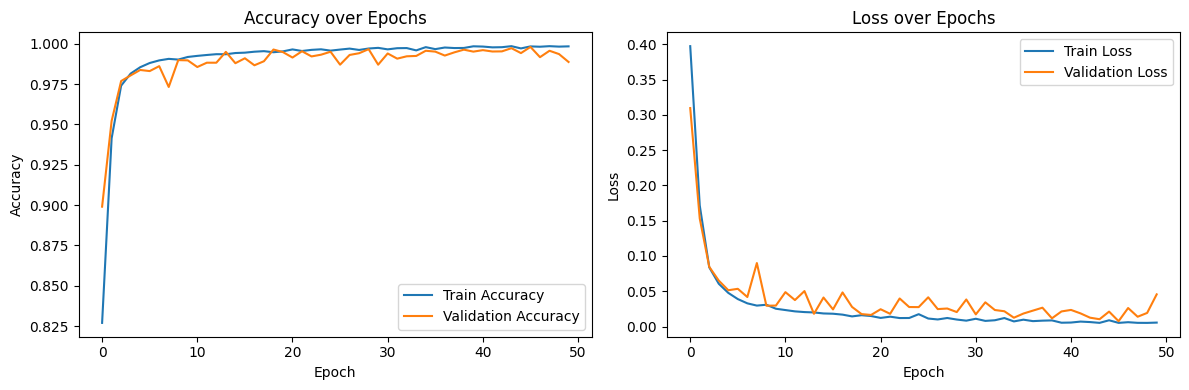


No Batch Normalization Model - Validation Set:
410/410 [==============================] - 1s 3ms/step
Accuracy: 0.9969
Precision: 0.9969
Recall: 0.9920
F1 Score: 0.9944

Confusion Matrix:
[[9488   11]
 [  29 3574]]


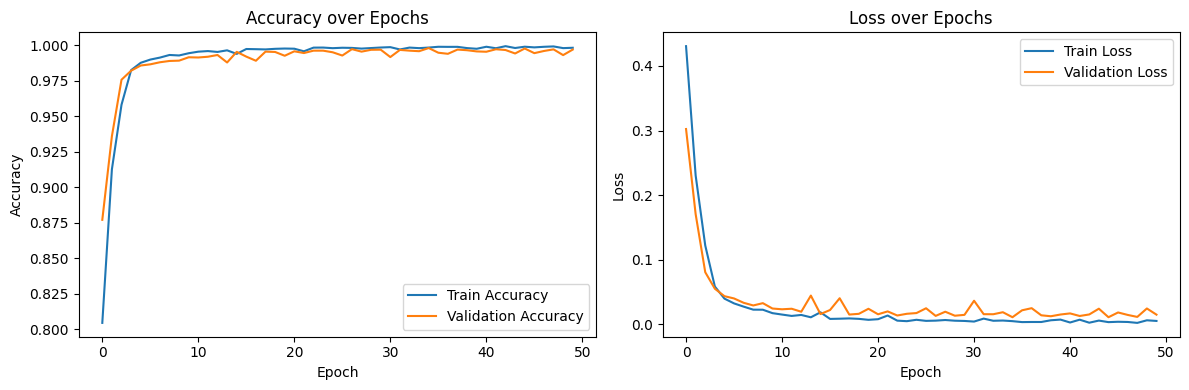

In [187]:
def build_bn_model():
    model = keras.Sequential([
        layers.Dense(128, input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

bn_model = build_bn_model()
bn_history = bn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    verbose=0
)

print("Batch Normalization Model - Validation Set:")
evaluate_model(bn_model, X_val, y_val)
plot_history(bn_history)

# Compare with a similar model without batch normalization
def build_no_bn_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

no_bn_model = build_no_bn_model()
no_bn_history = no_bn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    verbose=0
)

print("\nNo Batch Normalization Model - Validation Set:")
evaluate_model(no_bn_model, X_val, y_val)
plot_history(no_bn_history)